In [541]:
import numpy as np
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

# Gathering

In [83]:
# make directory if it does't exist
folder_name= 'Supporting Materials'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [84]:
# create loop to donwload 'Twitter-Archive-Enhanced','Image-Predictions'
# 'Tweet-Json' files
url = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
       'https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv',
       'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt']
for i in url:
    response = requests.get(i)
    with open(os.path.join(folder_name,
                           i.split('/')[-1]),mode= 'wb') as file:
        file.write(response.content)

In [85]:
path = 'C:/Users/victo/OneDrive/桌面/Twitter-WeRateDogs-API-Wrangle-and-Analyze-Data/Supporting Materials/'
archive_df = pd.read_csv('{}twitter-archive-enhanced-2.csv'.format(path))

In [86]:
image_df = pd.read_csv('{}image-predictions.tsv'.format(path), delimiter = '\t')

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760


KeyboardInterrupt: 

In [87]:
# create a list for converting to pd.datafram
tweetlist =[]
with open('{}tweet-json.txt'.format(path),encoding = 'utf-8') as file:
    # use for loop to convert txt file line by line to json object
    for line in file.readlines():
        data = json.loads(line)
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        # create dictionary and append it to list
        tweetdic = {'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                   'favorite_count': favorite_count}
        tweetlist.append(tweetdic)

In [88]:
# convert list to DataFram
json_df = pd.DataFrame(tweetlist)

# Assessing
### twitter-archive-enhanced df
+ negligible columns: `in_reply_to_status_id`,`in_reply_to_user_id`
+ unknown suffix: `timestamp` has suffix +0000
+ wrong data type: `tweet_id`, `timestamp`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`
+ typo: `rating_numerator`,`rating_denominator`
+ tidiness: `text` contain multiple information
+ unified metric: add `quitient` column
+ typo: different dog stage
+ inconsistent format : dog stage lowercase
+ dataframe structure: melt different dog stages to one column
+ number of records doesn't match among three dataframes

In [89]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [90]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [91]:
archive_df['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [92]:
archive_df.tweet_id.duplicated().any()

False

### image-predictions table df
+ data quality
+ wrong data type: `tweet_id`
+ format consistency: dog breed need to be all lowercase 
+ data structure

In [93]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [95]:
image_df.tweet_id.duplicated().any()

False

### tweet-json df
+ all three dfs could merge as one df

In [96]:
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [97]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [98]:
json_df.tweet_id.duplicated().any()

False

# Cleaning

In [353]:
# make copies
adf = archive_df.copy()
idf = image_df.copy()
jdf = json_df.copy()

### twitter-archive-enhanced df 
> negligible columns:`in_reply_to_status_id`,`in_reply_to_user_id`

###### Define
`in_reply_to_status_id`and `in_reply_to_user_id` are two columns don't provide useful information therefor we drop them
###### Code

In [354]:
adf.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

###### Test

In [355]:
adf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

> unknown suffix: `timestamp` and `retweeted_status_timestamp`has suffix +0000

###### Define
slice off +0000

###### Code

In [356]:
timestamplist =['timestamp','retweeted_status_timestamp']
for timestamps in timestamplist:
    adf[timestamps] =adf[timestamps].str[:-6]

###### Test

In [357]:
adf[['timestamp','retweeted_status_timestamp']]

,timestamp,retweeted_status_timestamp
0,2017-08-01 16:23:56,NaN
1,2017-08-01 00:17:27,NaN
2,2017-07-31 00:18:03,NaN
3,2017-07-30 15:58:51,NaN
4,2017-07-29 16:00:24,NaN
...,...,...
2351,2015-11-16 00:24:50,NaN
2352,2015-11-16 00:04:52,NaN
2353,2015-11-15 23:21:54,NaN
2354,2015-11-15 23:05:30,NaN


> wrong data type: `tweet_id`, `timestamp`,`retweeted_status_timestamp`

In [358]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


In [359]:
adf[~(adf['retweeted_status_user_id'].isnull())].head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


###### Define
Convert ids to string. timestamps to datetime. Assuming all user ids are 10 digits long, pad retweeted_status_user_id with 0s

###### Code

In [360]:
# create list to iterate
idlist=['tweet_id','retweeted_status_id','retweeted_status_user_id']
for ids in idlist:
    # because retweeted ids are presented as float in scientific notation
    # we need to use format(f) to display as int
    adf[ids] =adf[ids].apply(lambda x: format(x, '.0f'))
for changedatatype in timestamplist:
    adf[changedatatype]= pd.to_datetime(adf[changedatatype])

In [361]:
adf[~(adf['retweeted_status_user_id']=='nan')].head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088256,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072512,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475648,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712,4196983835,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136960,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336,4196983835,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [362]:
# replace 'nan' with NaN
adf['retweeted_status_id'] = adf['retweeted_status_id'].replace('nan',np.nan)
adf['retweeted_status_user_id'] = adf['retweeted_status_user_id'].replace('nan',np.nan)

In [363]:
# pad retweeted_status_user_id with 0s to 10 digits long
adf['retweeted_status_user_id'] = adf['retweeted_status_user_id'].str.pad(10, side ='right',fillchar= '0')

###### Test

In [364]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 276.2+ KB


In [365]:
adf[~(adf['retweeted_status_user_id'].isnull())].sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
485,814578408554463232,2016-12-29 21:06:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,698195409219559424,4196983835,2016-02-12 17:22:12,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
250,845098359547420672,2017-03-24 02:22:04,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,773308824254029824,4196983835,2016-09-06 23:56:05,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
431,820837357901512704,2017-01-16 03:37:31,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Finn. He's wondering if...,819227688460238848,4196983835,2017-01-11 17:01:16,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
618,796177847564038144,2016-11-09 02:29:25,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ruby. She just turned o...,796149749086875648,4196983835,2016-11-09 00:37:46,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None
606,798340744599797760,2016-11-15 01:44:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,771770456517009408,4196983835,2016-09-02 18:03:10,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None


> typo: `rating_numerator`,`rating_denominator`
###### Define
re-extract rating_numerator and rating_denominatorvalue from `text` 
###### Code

In [366]:
# match regex and slice off '/'
adf['rating_numerator'] = adf['text'].str.extract(r'(\d+(\.\d+)?/)', expand = True)[0]
adf['rating_numerator'] = adf['rating_numerator'].str[:-1]

adf['rating_denominator'] = adf['text'].str.extract(r'(/\d+(\.\d+)?)', expand = True)[0]
adf['rating_denominator']= adf['rating_denominator'].str[1:]

# change data type
adf[['rating_numerator','rating_denominator']] = adf[['rating_numerator','rating_denominator']].astype(float)

###### Test

In [367]:
adf[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
...,...,...
2351,5.0,10.0
2352,6.0,10.0
2353,9.0,10.0
2354,7.0,10.0


In [368]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 276.2+ KB


> tidiness: `text` contain multiple information

###### Define
add new column to store url, then slice off url from text and drop column 'expanded_urls' becasue it provides same imformation as 'image'
###### Code

In [369]:
# add new column 'image'
adf['image'] =adf['text'].str.extract('([https]+://[\w(\.|/)]+)')

In [370]:
# use string.split(pattern, 1)[0] to slice off url
adf['text'] = adf['text'].apply(lambda x: x.split('https://',1)[0].strip())

In [371]:
# drop column 'expanded_urls'
adf.drop(['expanded_urls'], axis = 1, inplace = True)

###### Test

In [372]:
adf.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image
0,892420643555336192,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,13.0,10.0,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343424,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,13.0,10.0,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10.0,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10.0,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10.0,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


> unified metric
###### Define
add `quotient` column, calculate as: rating_numerator/rating_denominator
###### Code

In [373]:
# insert new column 'quotient' after 'rating_denominator'
data = adf['rating_numerator']/adf['rating_denominator']
adf.insert(9, 'quotient', data)

###### Test

In [374]:
adf.head(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,quotient,name,doggo,floofer,pupper,puppo,image
0,892420643555336192,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,13.0,10.0,1.3,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343424,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,13.0,10.0,1.3,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10.0,1.2,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10.0,1.3,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10.0,1.2,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


> typo: different dog stage
###### Define
re-extract different dog stages 
###### code

In [375]:
adf['doggo'] = adf['text'].str.extract('([Dd]oggo)')
adf['floofer'] = adf['text'].str.extract('([Ff]loofer)')
adf['pupper'] = adf['text'].str.extract('([Pp]upper)')
adf['puppo'] = adf['text'].str.extract('([Pp]uppo)')

###### Test

In [376]:
dogstage= ['doggo','floofer','puppo','pupper']
def checknum():
    for stages in dogstage:
        result = adf[stages].value_counts()
        print(result)
checknum()

doggo    97
Doggo     9
Name: doggo, dtype: int64
Floofer    6
floofer    4
Name: floofer, dtype: int64
puppo    37
Puppo     1
Name: puppo, dtype: int64
pupper    271
Pupper      8
Name: pupper, dtype: int64


> inconsistency: dog stage lowercase
###### Define
change all the dog stage to lowercase
###### code

In [377]:
adf.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,quotient,name,doggo,floofer,pupper,puppo,image
0,892420643555336192,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,13.0,10.0,1.3,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU
1,892177421306343424,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,13.0,10.0,1.3,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10.0,1.2,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10.0,1.3,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10.0,1.2,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f


In [378]:
columnlist = ['doggo','floofer','puppo','pupper']
for columns in columnlist:
    adf[columns]=adf[columns].str.lower()

###### Test

In [379]:
def checklower():
    for stage in dogstage:
        result = adf[stage].value_counts()
        print(result)
checklower()

doggo    106
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
puppo    38
Name: puppo, dtype: int64
pupper    279
Name: pupper, dtype: int64


> dataframe structure: melt different dog stages to one column
###### Define
combine four columns indicate different dog stage to one single 'dog_stage' column
###### code

In [380]:
# concat four columns together, fill NaN with ''
adf['dog_stage'] = adf['doggo'].fillna('')+adf['floofer'].fillna('')+adf['puppo'].fillna('')+adf['pupper'].fillna('')
# place NaN back to replcae ''
adf['dog_stage'] = adf['dog_stage'].replace('',np.nan)
# drop four columns
adf.drop(adf.iloc[:,11:15], axis =1, inplace = True)

###### Test

In [381]:
adf['dog_stage'].value_counts()

pupper          267
doggo            91
puppo            36
doggopupper      12
floofer           9
doggopuppo        2
doggofloofer      1
Name: dog_stage, dtype: int64

In [382]:
adf.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,quotient,name,image,dog_stage
0,892420643555336192,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,13.0,10.0,1.3,Phineas,https://t.co/MgUWQ76dJU,NaN
1,892177421306343424,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,13.0,10.0,1.3,Tilly,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10.0,1.2,Archie,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10.0,1.3,Darla,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10.0,1.2,Franklin,https://t.co/AtUZn91f7f,NaN


### image-predictions table df
> data quality
###### Define
filter out dog only
###### Code

In [383]:
idf =idf.query('p1_dog == 1 or p2_dog ==1 or p3_dog ==1')

###### Test

In [384]:
idf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


> wrong data type: `tweet_id`
###### Define
`tweet_id` should be string
###### Code

In [385]:
idf['tweet_id'] = idf['tweet_id'].astype(str)

###### Test

In [386]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


> Data structure
###### Define
keep most confident precision of dog breed only
###### Code

In [387]:
# p1_conf indicate the most confident precision
# so we filter out p1_dog True first
idf1 = idf.query('p1_dog ==1')
# drop unrelated columns and rename 'p1'
idf1 = idf1.iloc[:,:4].rename(columns= {'p1': 'breed'})
idf1.sample(5)

,tweet_id,jpg_url,img_num,breed
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed


In [388]:
# p2_conf indicate the 2nd most confident precision
# so we filter out p1_dog False and p2_dog True
idf2 = idf.query('p1_dog ==0 and p2_dog ==1')
# drop unrelated columns and rename 'p2'
idf2 = idf2.iloc[:,np.r_[:3,6]].rename(columns= {'p2': 'breed'})
idf2.sample(5)

,tweet_id,jpg_url,img_num,breed
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,French_bulldog
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,pug
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,groenendael
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,American_Staffordshire_terrier


In [389]:
# filter out p1_dog, p2_dog are both false but p3_dog True
idf3 = idf.query('p1_dog ==0 and p2_dog ==0 and p3_dog ==1')
# drop unrelated columns and rename 'p2'
idf3 = idf3.iloc[:,np.r_[:3,9]].rename(columns= {'p3': 'breed'})
idf3.sample(5)

,tweet_id,jpg_url,img_num,breed
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,Pembroke
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,beagle
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,Shetland_sheepdog
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,cocker_spaniel
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,golden_retriever


In [390]:
# append all three dfs together
idf = idf1.append(idf2.append(idf3))

###### Test

In [391]:
idf.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


> format consistency: dog breed need to be all lowercase 
###### Define
dog breed need to be all lowercase
###### Code

In [392]:
idf['breed'] = idf['breed'].str.lower()

###### Test

In [393]:
idf['breed'].value_counts()

golden_retriever        173
labrador_retriever      113
pembroke                 96
chihuahua                95
pug                      65
                       ... 
japanese_spaniel          1
silky_terrier             1
clumber                   1
bouvier_des_flandres      1
standard_schnauzer        1
Name: breed, Length: 113, dtype: int64

> data structure
###### Define
drop negligible column `img_num`
###### Code

In [394]:
idf.drop('img_num', axis = 1, inplace =True)

###### Test

In [395]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2026
Data columns (total 3 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
breed       1751 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


### tweet-json df
> all three dfs could merge as one df
###### Define
merge three dfs on tweet_id
###### Code

In [396]:
df = pd.merge(jdf,idf,on ='tweet_id')
masterdf = pd.merge(df, adf, on ='tweet_id')

###### Test

In [397]:
masterdf

,tweet_id,retweet_count,favorite_count,jpg_url,breed,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,quotient,name,image,dog_stage
0,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,12.0,10.0,1.2,Archie,https://t.co/wUnZnhtVJB,NaN
1,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador_retriever,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,13.0,10.0,1.3,Darla,https://t.co/tD36da7qLQ,NaN
2,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,12.0,10.0,1.2,Franklin,https://t.co/AtUZn91f7f,NaN
3,891087950875897856,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,13.0,10.0,1.3,None,https://t.co/kQ04fDDRmh,NaN
4,890729181411237888,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,13.0,10.0,1.3,None,https://t.co/v0nONBcwxq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,666071193221509120,67,154,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,gordon_setter,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaT,9.0,10.0,0.9,None,https://t.co/ZoL8kq2XFx,NaN
1136,666058600524156928,61,115,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaT,8.0,10.0,0.8,the,https://t.co/pYAJkAe76p,NaN
1137,666057090499244032,146,304,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaT,9.0,10.0,0.9,a,https://t.co/yWBqbrzy8O,NaN
1138,666044226329800704,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,6.0,10.0,0.6,a,https://t.co/DWnyCjf2mx,NaN


In [398]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1139
Data columns (total 17 columns):
tweet_id                      1140 non-null object
retweet_count                 1140 non-null int64
favorite_count                1140 non-null int64
jpg_url                       1140 non-null object
breed                         1140 non-null object
timestamp                     1140 non-null datetime64[ns]
source                        1140 non-null object
text                          1140 non-null object
retweeted_status_id           40 non-null object
retweeted_status_user_id      40 non-null object
retweeted_status_timestamp    40 non-null datetime64[ns]
rating_numerator              1140 non-null float64
rating_denominator            1140 non-null float64
quotient                      1140 non-null float64
name                          1140 non-null object
image                         1140 non-null object
dog_stage                     189 non-null object
dtypes: datetime

> inconsistency format: name
###### Define
title names, replace 'None' with NaN
###### Code

In [399]:
masterdf['name'] = masterdf['name'].str.title()
masterdf['name'] = masterdf['name'].replace('None',np.nan)

###### Test

In [400]:
masterdf['name']

0         Archie
1          Darla
2       Franklin
3            NaN
4            NaN
          ...   
1135         NaN
1136         The
1137           A
1138           A
1139           A
Name: name, Length: 1140, dtype: object

> chop off columns that are not useful for analysing, contain duplicate information
###### Deinfe
drop `jpg_url`,`timestamp`,`retweeted_status_id`,`retweeted_status_timestamp`
###### Code

In [401]:
# get indexed of columns
pd.DataFrame(masterdf.columns)

,0
0,tweet_id
1,retweet_count
2,favorite_count
3,jpg_url
4,breed
5,timestamp
6,source
7,text
8,retweeted_status_id
9,retweeted_status_user_id


In [402]:
# drop columns by indexes
masterdf = masterdf.iloc[:,np.r_[:3,4,7,9,11:17]]

###### Test

In [403]:
masterdf

,tweet_id,retweet_count,favorite_count,breed,text,retweeted_status_user_id,rating_numerator,rating_denominator,quotient,name,image,dog_stage
0,891815181378084864,4328,25461,chihuahua,This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,1.2,Archie,https://t.co/wUnZnhtVJB,NaN
1,891689557279858688,8964,42908,labrador_retriever,This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,1.3,Darla,https://t.co/tD36da7qLQ,NaN
2,891327558926688256,9774,41048,basset,This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,1.2,Franklin,https://t.co/AtUZn91f7f,NaN
3,891087950875897856,3261,20562,chesapeake_bay_retriever,Here we have a majestic great white breaching ...,NaN,13.0,10.0,1.3,NaN,https://t.co/kQ04fDDRmh,NaN
4,890729181411237888,16716,56848,pomeranian,When you watch your owner call another dog a g...,NaN,13.0,10.0,1.3,NaN,https://t.co/v0nONBcwxq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1135,666071193221509120,67,154,gordon_setter,Here we have a northern speckled Rhododendron....,NaN,9.0,10.0,0.9,NaN,https://t.co/ZoL8kq2XFx,NaN
1136,666058600524156928,61,115,miniature_poodle,Here is the Rand Paul of retrievers folks! He'...,NaN,8.0,10.0,0.8,The,https://t.co/pYAJkAe76p,NaN
1137,666057090499244032,146,304,golden_retriever,My oh my. This is a rare blond Canadian terrie...,NaN,9.0,10.0,0.9,A,https://t.co/yWBqbrzy8O,NaN
1138,666044226329800704,147,311,rhodesian_ridgeback,This is a purebred Piers Morgan. Loves to Netf...,NaN,6.0,10.0,0.6,A,https://t.co/DWnyCjf2mx,NaN


# Save file

In [404]:
masterdf.to_csv('twitter_archive_master.csv', index= False)

# Data Analyzation

In [744]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,retweet_count,favorite_count,breed,text,retweeted_status_user_id,rating_numerator,rating_denominator,quotient,name,image,dog_stage
0,891815181378084864,4328,25461,chihuahua,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,12.0,10.0,1.2,Archie,https://t.co/wUnZnhtVJB,NaN
1,891689557279858688,8964,42908,labrador_retriever,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,13.0,10.0,1.3,Darla,https://t.co/tD36da7qLQ,NaN
2,891327558926688256,9774,41048,basset,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,12.0,10.0,1.2,Franklin,https://t.co/AtUZn91f7f,NaN
3,891087950875897856,3261,20562,chesapeake_bay_retriever,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,13.0,10.0,1.3,NaN,https://t.co/kQ04fDDRmh,NaN
4,890729181411237888,16716,56848,pomeranian,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,13.0,10.0,1.3,NaN,https://t.co/v0nONBcwxq,NaN


In [745]:
df.describe()

,tweet_id,retweet_count,favorite_count,retweeted_status_user_id,rating_numerator,rating_denominator,quotient
count,1.140000e+03,1140.000000,1140.000000,4.000000e+01,1140.000000,1140.000000,1140.000000
mean,7.386192e+17,2911.939474,8440.280702,4.311139e+09,11.352211,10.481579,1.082615
std,6.733339e+16,4750.252658,11430.204431,5.896539e+08,8.014061,6.949499,0.192088
min,6.660293e+17,16.000000,0.000000,4.196984e+09,1.000000,2.000000,0.200000
25%,6.766059e+17,620.500000,1662.000000,4.196984e+09,10.000000,10.000000,1.000000
50%,7.140304e+17,1440.500000,3946.500000,4.196984e+09,11.000000,10.000000,1.100000
75%,7.909661e+17,3443.250000,10555.750000,4.196984e+09,12.000000,10.000000,1.200000
max,8.918152e+17,56625.000000,107015.000000,7.832140e+09,165.000000,150.000000,3.428571


> We can have an overall insight about statistical results here. On average, those tweets was retweeted 2912 times, was 'liked' 8440 times, the average quotient, although giving the fact 'those are good dogs' and expect quotients would be way above 1, there are few were rated under 1, make up the average quotient round 1. This also make sense consider 50% quotient is 1.1 or less. 

In [746]:
pd.set_option('max_colwidth', 800)
# inspect ones has the least quotient
df.query('quotient == 0.2')

,tweet_id,retweet_count,favorite_count,breed,text,retweeted_status_user_id,rating_numerator,rating_denominator,quotient,name,image,dog_stage
537,722974582966214656,1764,4493,great_dane,Happy 4/20 from the squad! 13/10 for all,NaN,4.0,20.0,0.2,NaN,https://t.co/eV1diwds8a,NaN
827,678424312106393600,2880,5916,maltese_dog,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible,NaN,2.0,10.0,0.2,Crystal,https://t.co/rtMtjSl9pz,NaN


> Consider tweet id 722974582966214656 as an example. The text is :”Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a.” the correct extraction would be 13/10, but regex will capture both 4/20 and 13/10. We can choose to extract the second group manually , but in other text the correct match might be the first group, there is no good way to extract group correctly except going through one by one manually, which is not practical. Therefor, I decided not to take quotient in as a metric.

###### Name distribution

In [747]:
df['name'].value_counts()

A           30
Oliver       8
Tucker       7
Lucy         6
Cooper       6
            ..
Chadrick     1
Sunny        1
Aja          1
Tayzie       1
Crouton      1
Name: name, Length: 611, dtype: int64

> Regardless invalid names, the most common name people like to name their dogs seems to be 'Oliver'.

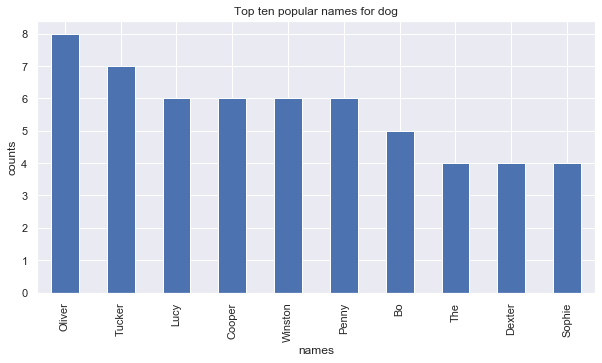

In [748]:
df['name'].value_counts()[1:11].plot(kind= 'bar', figsize = (10,5))
plt.title('Top ten popular names for dog')
plt.xlabel('names')
plt.ylabel('counts');

###### Breed distribution vs average/total favorites

In [749]:
# top ten average/total favorite dog breeds
breed_avgfav = df.groupby('breed')['favorite_count'].mean().sort_values(ascending = False)[:11]
breed_sumfav = df.groupby('breed')['favorite_count'].sum().sort_values(ascending = False)[:11]
print(breed_avgfav, breed_sumfav)

breed
saluki                   32444.500000
bedlington_terrier       27082.000000
irish_water_spaniel      23561.500000
standard_poodle          17490.142857
afghan_hound             17337.500000
flat-coated_retriever    16791.625000
border_terrier           16081.000000
french_bulldog           15596.000000
basset                   14656.400000
whippet                  13935.666667
norwich_terrier          13304.000000
Name: favorite_count, dtype: float64 breed
golden_retriever            1351563
labrador_retriever           764956
pembroke                     749214
chihuahua                    451081
french_bulldog               343112
samoyed                      277777
cocker_spaniel               248249
malamute                     237922
chesapeake_bay_retriever     231857
pug                          230353
chow                         216831
Name: favorite_count, dtype: int64


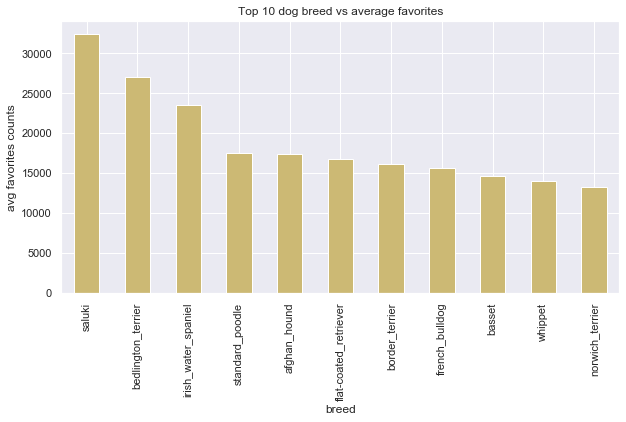

In [750]:
# plot top ten average favorite dog breeds
breed_avgfav.plot(kind = 'bar', color = 'y',figsize=(10,5))
plt.title('Top 10 dog breed vs average favorites')
plt.ylabel('avg favorites counts');

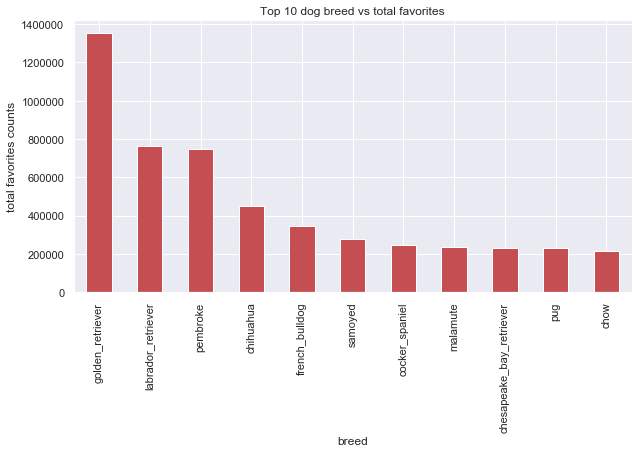

In [751]:
# plot top ten total favorite dog breeds
breed_sumfav.plot(kind = 'bar', color = 'r',figsize=(10,5))
plt.title('Top 10 dog breed vs total favorites')
plt.ylabel('total favorites counts');

> Here we can see the difference of 'top 10 most favorited dog breeds' when we use different metrics. On average, every saluki dog post earned 32444 'favorites' as the most popular dog breed, while golden retriever seems to be the most popular dog breed when we compare the total 'favorites' earned over time.

###### Correlationship between retweet_count, favorite_count and different dog stages

In [752]:
# make mask for records with valid dog stage
dfstage = df[~(df['dog_stage'].isnull())]

In [753]:
dfstage['dog_stage'].value_counts()

pupper          129
doggo            30
puppo            18
doggopupper       5
floofer           4
doggopuppo        2
doggofloofer      1
Name: dog_stage, dtype: int64

In [754]:
# investigate ones with multiple stages
dfstage.query('dog_stage == "doggopupper"')['text']

249    This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine
392    Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time
429            Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho
480                                                         This is just downright precious af. 12/10 for both pupper and doggo
510                                                                          Like father (doggo), like son (pupper). Both 12/10
Name: text, dtype: object

In [755]:
# split records with two dog stage to two dfs, each with one dog stage
multistage = dfstage.query('dog_stage == "doggopupper" or dog_stage == "doggopuppo" or dog_stage == "doggofloofer"')
df1= multistage.copy(deep=True)
df1['dog_stage'] = df1['dog_stage'].str[:5]
df2 = multistage.copy(deep= True)
df2['dog_stage'] = df2['dog_stage'].str[5:]

In [756]:
# append two dfs together
df1 = df1.append(df2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 80 to 510
Data columns (total 12 columns):
tweet_id                    16 non-null int64
retweet_count               16 non-null int64
favorite_count              16 non-null int64
breed                       16 non-null object
text                        16 non-null object
retweeted_status_user_id    0 non-null float64
rating_numerator            16 non-null float64
rating_denominator          16 non-null float64
quotient                    16 non-null float64
name                        6 non-null object
image                       16 non-null object
dog_stage                   16 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 1.6+ KB


In [757]:
# drop records with multiple stage from dfstage
dfstage.drop(index= multistage.index ,inplace = True)
# then append df1 to dfstage
dfstage = dfstage.append(df1)
dfstage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 17 to 510
Data columns (total 12 columns):
tweet_id                    197 non-null int64
retweet_count               197 non-null int64
favorite_count              197 non-null int64
breed                       197 non-null object
text                        197 non-null object
retweeted_status_user_id    7 non-null float64
rating_numerator            197 non-null float64
rating_denominator          197 non-null float64
quotient                    197 non-null float64
name                        123 non-null object
image                       197 non-null object
dog_stage                   197 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 20.0+ KB


In [758]:
dfstage['dog_stage'].value_counts()

pupper     134
doggo       38
puppo       20
floofer      5
Name: dog_stage, dtype: int64

In [759]:
# set intercept
dfstage['intercept'] = 1
# reset index to omit duplicates when join dummy columns
dfstage =dfstage.reset_index(drop = True)

In [760]:
# create dummies columns for different dog stage
dfstage = dfstage.join(pd.get_dummies(dfstage['dog_stage']))

In [761]:
# fit linear regression model
sm.OLS(dfstage['favorite_count'], dfstage[['intercept','retweet_count','puppo','doggo','floofer']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     61.26
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           2.80e-33
Time:                        17:32:45   Log-Likelihood:                -2058.3
No. Observations:                 197   AIC:                             4127.
Df Residuals:                     192   BIC:                             4143.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      3243.9797    783.089      4.143      0.000    1699.417    4788.542
retweet_count     1.5904      0.111     14.279      0.000       1.371       1.810
puppo          5111.4323   2043.147      2.502      0.013    1081.536    9141.328
doggo          1548.7552   1622.554      0.955      0.341   -1651.565    4749.075
floofer         904.3662   3848.761      0.235      0.814   -6686.917    8495.650
==============================================================================
Omnibus:                      171.642   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6880.452
Skew:                          -2.866   Prob(JB):                         0.00
Kurtosis:                      31.379   Cond. No.                     4.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

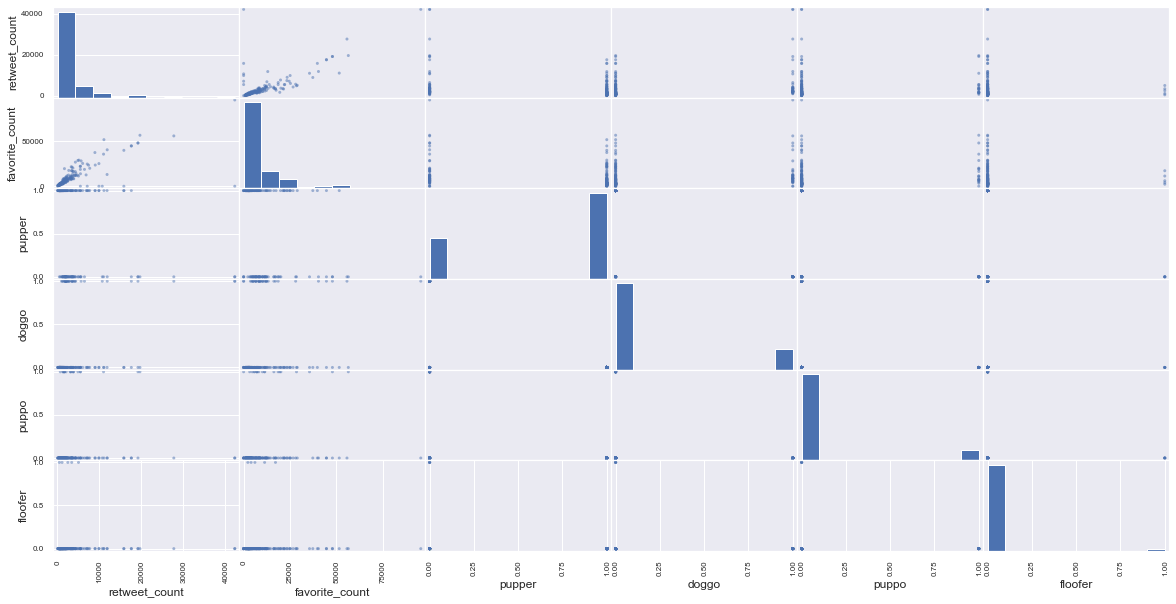

In [762]:
pd.plotting.scatter_matrix(dfstage[['retweet_count','favorite_count','pupper','doggo','puppo','floofer']], figsize = (20,10));

> From the model we can tell retweet_count and favorite_count has a very strong positive correlationship. Every additional retweet is likely to result more than 1 'favorite'. With everything else being equal, we expect dogs at 'puppo' stage receive 5111 more 'favorites' than dogs at 'pupper' stage(baseline), 'doggo' receive 1549 more 'favorites' than 'pupper', 'floofer' receive 904 more 'favorites' than 'pupper'
+ limitation: sample size is not large (197 counts), leads to inaccurate prediction. On the other hand, p-value and scatter plot indicate different dog stage don't have strong correlation with number of 'favorite'.

In [763]:
# statistical results
# relationship agree with model result
dfstage.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo      15551.736842
floofer     8164.800000
pupper      7292.365672
puppo      16223.950000
Name: favorite_count, dtype: float64